In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv('data.csv')

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#Encode the target variable 'diagnosis'
# Drop the 'Unnamed: 32' column
df.drop(labels = 'Unnamed: 32', inplace=True,axis = 1)

# Encode the target variable 'diagnosis'
x = df.iloc[:,2:].values
y = df.iloc[:,1].values
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.1, random_state=0)

In [ ]:
# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Define the model architecture
model = Sequential([
    Dense(32, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Define the model architecture and compile it
model = Sequential()
model.add(Dense(16,activation='relu', input_shape = (30,)))
model.add(Dropout(0.1))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense( 1 , activation='sigmoid'))
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                496       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the model on the training set
model.fit(X_train, y_train, batch_size = 100, epochs = 150)

Epoch 1/150
6/6 [==============================] - 1s 4ms/step - loss: 0.7666 - accuracy: 0.5273
Epoch 2/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6647 - accuracy: 0.6133
Epoch 3/150
6/6 [==============================] - 0s 2ms/step - loss: 0.6004 - accuracy: 0.7070
Epoch 4/150
6/6 [==============================] - 0s 3ms/step - loss: 0.5501 - accuracy: 0.7656
Epoch 5/150
6/6 [==============================] - 0s 3ms/step - loss: 0.5133 - accuracy: 0.8145
Epoch 6/150
6/6 [==============================] - 0s 2ms/step - loss: 0.4720 - accuracy: 0.8262
Epoch 7/150
6/6 [==============================] - 0s 2ms/step - loss: 0.4431 - accuracy: 0.8711
Epoch 8/150
6/6 [==============================] - 0s 2ms/step - loss: 0.4048 - accuracy: 0.8672
Epoch 9/150
6/6 [==============================] - 0s 2ms/step - loss: 0.3742 - accuracy: 0.8926
Epoch 10/150
6/6 [==============================] - 0s 2ms/step - loss: 0.3442 - accuracy: 0.9062
Epoch 11/150
6/6 [===========

2/2 [==============================] - 0s 6ms/step


<Axes: >

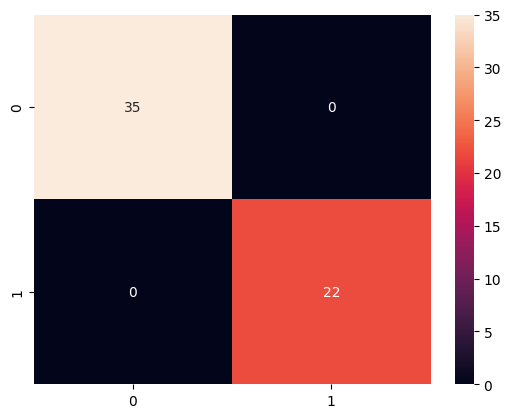

In [ ]:
# Predict on the test set and calculate confusion matrix
pred = model.predict(X_test)
pred = (pred > 0.5)
cm = confusion_matrix(y_test,pred)

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True)

In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/50
8/8 [==============================] - 1s 33ms/step - loss: 0.0471 - accuracy: 0.9824 - val_loss: 0.0152 - val_accuracy: 1.0000
Epoch 2/50
8/8 [==============================] - 0s 6ms/step - loss: 0.0418 - accuracy: 0.9844 - val_loss: 0.0172 - val_accuracy: 1.0000
Epoch 3/50
8/8 [==============================] - 0s 6ms/step - loss: 0.0321 - accuracy: 0.9902 - val_loss: 0.0181 - val_accuracy: 1.0000
Epoch 4/50
8/8 [==============================] - 0s 6ms/step - loss: 0.0360 - accuracy: 0.9883 - val_loss: 0.0169 - val_accuracy: 1.0000
Epoch 5/50
8/8 [==============================] - 0s 7ms/step - loss: 0.0367 - accuracy: 0.9922 - val_loss: 0.0161 - val_accuracy: 1.0000
Epoch 6/50
8/8 [==============================] - 0s 6ms/step - loss: 0.0406 - accuracy: 0.9863 - val_loss: 0.0164 - val_accuracy: 1.0000
Epoch 7/50
8/8 [==============================] - 0s 5ms/step - loss: 0.0362 - accuracy: 0.9902 - val_loss: 0.0175 - val_accuracy: 1.0000
Epoch 8/50
8/8 [=================

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

2/2 [==============================] - 0s 7ms/step - loss: 0.0111 - accuracy: 1.0000
Test accuracy: 1.0
